In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

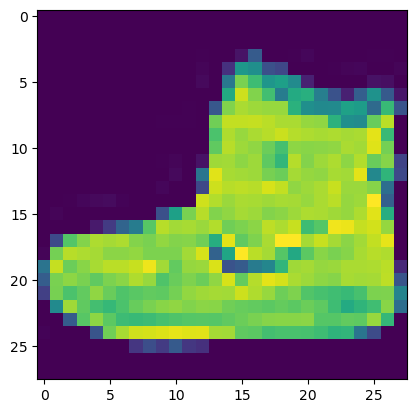

In [3]:
plt.imshow(x_train[1])
plt.imshow(x_train[0])

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
x_train.shape
(60000, 28, 28)
x_test.shape
(10000, 28, 28, 1)
y_train.shape
(60000,)
y_test.shape
(10000,)

(10000,)

In [7]:
model = keras.Sequential([
keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(64, (3,3), activation='relu'),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(128, (3,3), activation='relu'),

keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),

keras.layers.Dropout(0.25),
keras.layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [8]:
Model: "sequential"

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 59s 29ms/step - loss: 0.5682 - accuracy: 0.7890 - val_loss: 0.3630 - val_accuracy: 0.8672
Epoch 2/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.3674 - accuracy: 0.8664 - val_loss: 0.3410 - val_accuracy: 0.8700
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3208 - accuracy: 0.8817 - val_loss: 0.2857 - val_accuracy: 0.8936
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2937 - accuracy: 0.8916 - val_loss: 0.2775 - val_accuracy: 0.8994
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2746 - accuracy: 0.8970 - val_loss: 0.2703 - val_accuracy: 0.9014
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2614 - accuracy: 0.9037 - val_loss: 0.2636 - val_accuracy: 0.9041
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2507 - accuracy: 0.9064 - val_loss: 0.2503 -

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

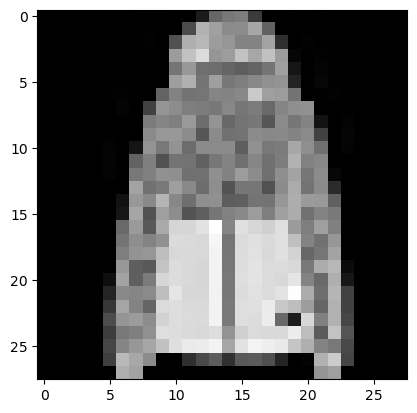

1/1 [==============================] - 0s 142ms/step
Predicted class: 4


In [11]:
plt.imshow(x_train[22], cmap='gray')
plt.show() 
input_image = x_train[22].reshape(-1, 28, 28, 1)
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions[0])
print("Predicted class:", predicted_class)